# Подготовка данных

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [64]:
img = cv2.imread('lena.jpg')
b,g,r = cv2.split(img)         
img = cv2.merge([r,g,b])   
img.shape

(800, 800, 3)

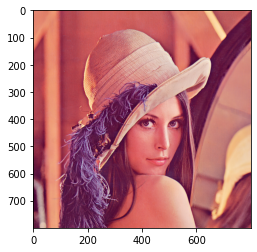

In [65]:
plt.imshow(img)

# Задание1

In [66]:
img_for_detect = img.copy()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_for_detect, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
faces

array([[337, 315, 269, 269]], dtype=int32)

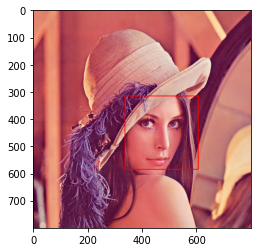

In [67]:
for (x, y, w, h) in faces:
    cv2.rectangle(img_for_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img_for_detect)

# Задание2

In [68]:
for i in range(2):
  faces[0][i] = round(faces[0][i] * 0.92)
for i in range(2, 4):
  faces[0][i] = round(faces[0][i] * 1.2)
faces = faces.astype(int)
faces

array([[310, 290, 323, 323]])

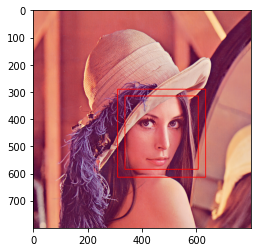

In [69]:
for (x, y, w, h) in faces:
    cv2.rectangle(img_for_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img_for_detect)

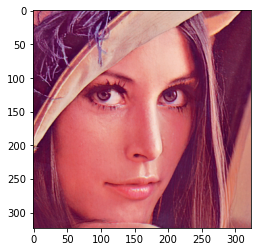

In [70]:
crop_img = img[faces[0][1]:faces[0][1] + faces[0][3], faces[0][0]:faces[0][0] + faces[0][2]]
plt.imshow(crop_img)

# Задание3

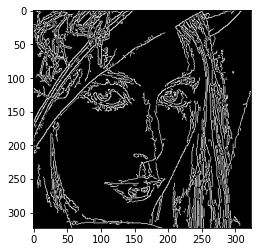

In [71]:
circuit = cv2.Canny(crop_img, 50, 200)
plt.imshow(circuit, cmap="gray")

# Задание4

In [72]:
contours_all, hierarchy = cv2.findContours(circuit, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(f"Сircuit = { len(contours_all)}")

Сircuit = 473


In [73]:
min_size = 10
constrain_contours = []
for countour in contours_all:
    if cv2.arcLength(countour, True) > min_size:
        constrain_contours.append(countour)
        continue
    x,y,w,h = cv2.boundingRect(countour)
    if w > min_size and h > min_size:
        constrain_contours.append(countour)
print(f"Сircuit more than 10: {len(constrain_contours)}")

Сircuit more than 10: 273


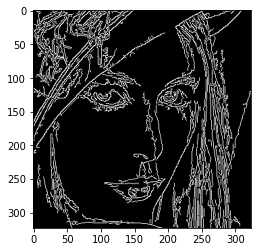

In [74]:
edges_c = circuit.copy() * 0
for i in constrain_contours:
    cv2.drawContours(edges_c, constrain_contours, -1, (255, 255, 0), 1)
plt.imshow(edges_c, cmap="gray")

# Задание5

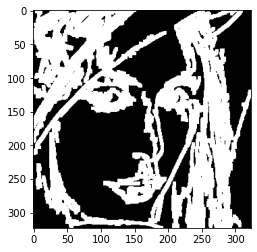

In [75]:
kernel = np.ones((5,5), np.uint8)
morph = cv2.dilate(edges_c, kernel, iterations = 1)
plt.imshow(morph, cmap="gray")

# Задание6

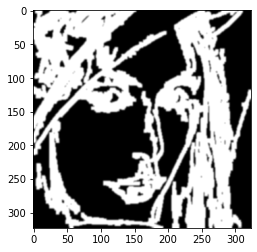

In [76]:
GaussianBlur = cv2.GaussianBlur(morph, (5,5), 1)
plt.imshow(GaussianBlur, cmap='gray')

# Задание7

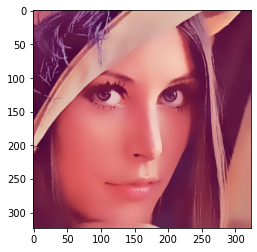

In [77]:
spectrum = (np.abs(crop_img))
F1 = cv2.bilateralFilter(spectrum, 20, 70, 70)
plt.imshow(F1, cmap="gray")

# Задание8

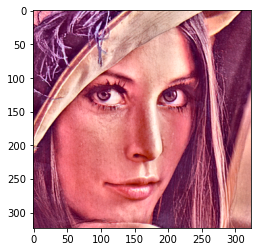

In [78]:
lab = cv2.cvtColor(crop_img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
F2 = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(F2)

# Задание9

In [79]:
M = GaussianBlur.copy()
Result = np.zeros((M.shape[0], M.shape[1], 3))
for x in range(M.shape[0]):
    for y in range(M.shape[1]):
      Result[x][y] = (round(M[x][y] * F2[x][y][0] + (1 - M[x][y]) * F1[x][y][0], 0), 
                      round(M[x][y] * F2[x][y][1] + (1 - M[x][y]) * F1[x][y][1], 0),
                      round(M[x][y] * F2[x][y][2] + (1 - M[x][y]) * F1[x][y][2], 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


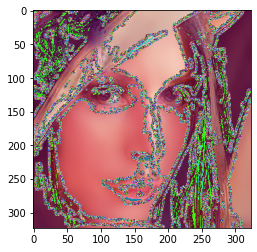

In [80]:
Result = Result.astype(np.uint8)
plt.imshow(Result)